In [14]:
from pylab import *
%matplotlib inline

In [84]:
def rk4(ec,p_ini,x,args=0,h=0.1):  
    if (x[1]-x[0]) <= 5*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [16]:
def e_mov(r_v,t):
    dx = r_v[2]
    dy = r_v[3]
    dvx,dvy = 0,0
    return array([dx,dy,dvx,dvy])

In [119]:
def rebote(r_v_i,mi_dt):
    dt_busqueda = (mi_dt)/2
    y_izq = r_v_i
    t,sol = rk4(e_mov,r_v_i,[0,dt_busqueda])
    y_med = sol[-1,:]
    r_1 = sqrt((y_izq[0])**2 + (y_izq[1])**2)
    while r_1 > b : # es esta parte si abs(y_izq[1]) esta por arriba del plano inclinado entra 
                                     # al ciclo, este es el unico cambio que se le hizo a este algoritmo
        reinicio = y_med
        dt_busqueda = dt_busqueda/2
        t,sol = rk4(e_mov,reinicio,[0,dt_busqueda])
        y_izq = reinicio
        y_med = sol[-1,:]
        r_1 = sqrt((y_izq[0])**2 + (y_izq[1])**2)
    ang = arccos((y_izq[0]*y_izq[2] + y_izq[1]*y_izq[3])/(sqrt(y_izq[0]**2 + y_izq[1]**2)*sqrt(y_izq[2]**2 + y_izq[3]**2)))
    y_izq2 =  -cos(-2*ang)*(y_izq[2]) - sin(-2*ang)*(y_izq[3]) 
    y_izq3 =  sin(-2*ang)*(y_izq[2]) - cos(-2*ang)*(y_izq[3]) 
    y_izq = array([y_izq[0],y_izq[1],y_izq2,y_izq3])    
    return y_izq

In [134]:
def rebote2(r_v_i,mi_dt):
    dt_busqueda = (mi_dt)/2
    y_izq = r_v_i
    t,sol = rk4(e_mov,r_v_i,[0,dt_busqueda])
    y_med = sol[-1,:]
    r_1 = sqrt((y_izq[0])**2 + (y_izq[1])**2)
    while r_1 < a : # es esta parte si abs(y_izq[1]) esta por arriba del plano inclinado entra 
                                     # al ciclo, este es el unico cambio que se le hizo a este algoritmo
        reinicio = y_med
        dt_busqueda = dt_busqueda/2
        t,sol = rk4(e_mov,reinicio,[0,dt_busqueda])
        y_izq = reinicio
        y_med = sol[-1,:]
        r_1 = sqrt((y_izq[0])**2 + (y_izq[1])**2)
    ang = arccos((y_izq[0]*y_izq[2] + y_izq[1]*y_izq[3])/(sqrt(y_izq[0]**2 + y_izq[1]**2)*sqrt(y_izq[2]**2 + y_izq[3]**2)))
    y_izq2 =  -cos(-2*ang)*(y_izq[2]) - sin(-2*ang)*(y_izq[3]) 
    y_izq3 =  sin(-2*ang)*(y_izq[2]) - cos(-2*ang)*(y_izq[3]) 
    y_izq = array([y_izq[0],y_izq[1],y_izq2,y_izq3])    
    return y_izq

In [18]:
def pendiente(angulo): # encuentra la pendiente en funcion del angulo dado
    m = -tan(angulo)
    return m 
def f(x,angulo,h):     # encuentra la recta del plano en funcion del angulo, p es la altura inicial
    if abs(x) <= 5:
        y=x*pendiente(angulo)+h
    else:
        y=-x*pendiente(angulo)-h   
    return y

In [19]:
def g(x,angulo):     # encuentra la recta del plano en funcion del angulo, p es la altura inicial
    f=x*pendiente(angulo)+2.8867513459481287
    return f
def k(z,angulo):
    f=-z*pendiente(angulo)-2.8867513459481287   
    return f

rebotes = 20


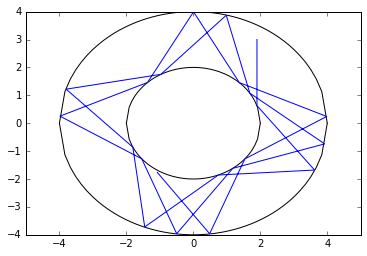

In [152]:
a=2
b=2*a
reb = 0
 # altura de la pendiente desde donde se hace el lazamiento
inicio = [1.9,3,0,-1] # las dos primeras entradas corresponden a la posicion inicial de la pelora (x,y)
                    # las ultimas dos estradas corresponde a las componetes de la velocidad incial de la pelota (vx,vy) 
N = 6000 # numero de puntos a calcular dentro de la trayectoria
trayectoria = zeros((N,len(inicio)))
mi_dt = .01
trayectoria[0,:] = array(inicio)
for i in range(N-1):
    t,sol_dt = rk4(e_mov,trayectoria[i,:],[0,mi_dt]) # aqui se escoje la friccion a utilizar
    r = sqrt((sol_dt[-1,:][1])**2 + (sol_dt[-1,:][0])**2)
    if r > b: # si la posicion en y de la pelota es menor a la altura del plano la pelota rebota
        punto = rebote(trayectoria[i,:],mi_dt)
        trayectoria[i+1,:] = punto 
        reb +=1
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]      
    if r < a: # si la posicion en y de la pelota es menor a la altura del plano la pelota rebota
        punto = rebote2(trayectoria[i,:],mi_dt)
        trayectoria[i+1,:] = punto 
        reb +=1
x=linspace(-b,b)
z=linspace(-b,b)
v=linspace(-a,a)
w=linspace(-a,a)
plot(x,sqrt(-x**2 + b**2),'black',z,-sqrt(-z**2 + b**2),'black')
plot(v,sqrt(-v**2 + a**2),'black',w,-sqrt(-w**2 + a**2),'black')
plot(trayectoria[:,0],trayectoria[:,1],'-') # grafica los punto de la trayectoria 
xlim([-b-1,b+1])
print "rebotes =",reb  # y el plano donde rebota la pelota
show()